# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Timer Class for Benchmarking

Taken from: http://howto.lintel.in/how-to-measure-the-duration-of-a-function-call-or-code-block-in-python/

In [1]:
import time

class StopWatch:
    def __init__(self):
        self.start = None
        self.end = None

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        print("Total time taken: {:.2f} seconds".format((self.end - self.start)))

    def duration(self):
        return str((self.end - self.start)) + ' seconds'

---
## Step 0: Load The Data

In [133]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'
validation_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
    
clr_X_train, y_train = train['features'], train['labels']
clr_X_test, y_test = test['features'], test['labels']
clr_X_validation, y_validation = validation['features'], validation['labels']


# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Updated image shape: ", format(clr_X_train[0].shape))

print("X_train: ", clr_X_train.shape, ", X_validation: ", clr_X_validation.shape, ", X_test: ", clr_X_test.shape)
print("y_train: ", y_train.shape, ", y_validation: ", y_validation.shape, ", y_test: ", y_test.shape)

Updated image shape:  (32, 32, 3)
X_train:  (34799, 32, 32, 3) , X_validation:  (4410, 32, 32, 3) , X_test:  (12630, 32, 32, 3)
y_train:  (34799,) , y_validation:  (4410,) , y_test:  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [134]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = clr_X_train.shape[0]

# TODO: Number of testing examples.
n_test = clr_X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = clr_X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape (before preprocessing) =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape (before preprocessing) = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

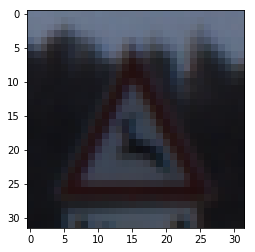

Min pixel for gray_image:  15
Max pixel for gray_image:  128
Min pixel for hist_image:  0
Max pixel for hist_image:  255
uint8
Min pixel for norm_image:  0
Max pixel for norm_image:  255
Min pixel for avg_image:  0.0
Max pixel for avg_image:  84.6666666667
31


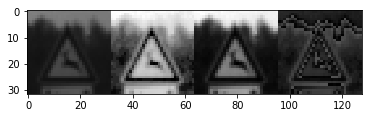

In [135]:
import random
import cv2
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()
image = clr_X_train[index]

plt.imshow(image)
plt.show()


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Min pixel for gray_image: ", np.min(gray_image))
print("Max pixel for gray_image: ", np.max(gray_image))

hist_image = cv2.equalizeHist(gray_image)
print("Min pixel for hist_image: ", np.min(hist_image))
print("Max pixel for hist_image: ", np.max(hist_image))

print(gray_image.dtype)
norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print("Min pixel for norm_image: ", np.min(norm_image))
print("Max pixel for norm_image: ", np.max(norm_image))

avg_image = (gray_image + hist_image + norm_image) / 3
print("Min pixel for avg_image: ", np.min(avg_image))
print("Max pixel for avg_image: ", np.max(avg_image))


print(y_train[index])

# plt.figure(figsize=(1,1))

plt.imshow(np.hstack((gray_image, hist_image, norm_image, avg_image)), cmap='gray')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [136]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def preprocess(img):
    original_shape = img.shape
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return gray_image.reshape(gray_image.shape + (1,))

def preprocess_list(images):
    processed_images = [preprocess(img) for img in images]
    return np.array(processed_images).reshape((images.shape[0],) + processed_images[0].shape)
#     print("Shape image: ", [preprocess(img) for img in images][0].shape)
#     return np.array([preprocess(img) for img in images]).reshape((images.shape[0],) + images[0].shape)
#     return images

print("Preprocessing images")
with StopWatch() as sw:
#     X_train = X_train[:5]
    print("Shape before preprocessing: ", clr_X_train.shape)
    X_train = preprocess_list(clr_X_train)
    print("Shape after preprocessing: ", X_train.shape)
    X_test = preprocess_list(clr_X_test)
    X_validation = preprocess_list(clr_X_validation)
    
image_shape = X_train[0].shape
print("Image shape (after preprocessing): ", image_shape)

Preprocessing images
Shape before preprocessing:  (34799, 32, 32, 3)
Shape after preprocessing:  (34799, 32, 32, 1)
Total time taken: 1.02 seconds
Image shape (after preprocessing):  (32, 32, 1)


## Visualize after preprocessing

Image random index:  3466
uint8
1


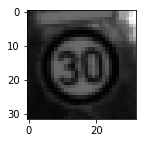

In [160]:
import random
import cv2
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
print("Image random index: ", index)
# image = X_train[index].squeeze()
gray_image = X_train[index].squeeze()

print(gray_image.dtype)

print(y_train[index])

plt.figure(figsize=(2,2))
plt.imshow(gray_image, cmap='gray')
plt.show()


### Model Architecture

In [161]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

def conv(conv_input, filter_dim, input_depth, output_depth, stride_dim):
    conv_weight = tf.Variable(tf.truncated_normal([filter_dim, filter_dim, input_depth, output_depth], mean=mu, stddev=sigma))
    conv_bias = tf.Variable(tf.zeros(output_depth))
    
    conv_layer = tf.nn.conv2d(conv_input, conv_weight, strides = [1, stride_dim, stride_dim, 1], padding='VALID')
    conv_layer = tf.nn.bias_add(conv_layer, conv_bias)
    conv_layer = tf.nn.relu(conv_layer)
    return conv_layer

def fc(fc_input, fc_input_dim, fc_output_dim):
    fc_weight = tf.Variable(tf.truncated_normal([fc_input_dim, fc_output_dim], mean=mu, stddev=sigma))
    fc_bias = tf.Variable(tf.zeros(fc_output_dim))
    fc_layer = tf.matmul(fc_input, fc_weight) + fc_bias
    fc_layer = tf.nn.relu(fc_layer)
    return fc_layer

def max_pool(pool_input, max_dim, stride_dim):
    return tf.nn.max_pool(pool_input, ksize =[1, max_dim, max_dim, 1], strides=[1, stride_dim, stride_dim, 1], padding='VALID')

def LeNet(x):    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv_layer1 = conv(x, 5, image_shape[2], 6, 1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = max_pool(conv_layer1, 2, 2)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_layer2 = conv(conv_layer1, 5, 6, 16, 1)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = max_pool(conv_layer2, 2, 2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv_layer2 = flatten(conv_layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_layer3 = fc(conv_layer2, 400, 120)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_layer4 = fc(fc_layer3, 120, 84)

    # Layer 5: Fully Connected. Input = 84. Output = 43
    fc_layer5 = fc(fc_layer4, 84, n_classes)
    
    logits = fc_layer5
    
    return logits

def LeNet_old(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    conv_layer1_weight = tf.Variable(tf.truncated_normal([5, 5, image_shape[2], 6], mean=mu, stddev=sigma))
    conv_layer1_bias = tf.Variable(tf.zeros(6))
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv_layer1 = tf.nn.conv2d(x, conv_layer1_weight, strides=[1, 1, 1, 1], padding='VALID')
    conv_layer1 = tf.nn.bias_add(conv_layer1, conv_layer1_bias)

    # TODO: Activation.
    conv_layer1 = tf.nn.relu(conv_layer1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_layer2_weight = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    conv_layer2_bias = tf.Variable(tf.zeros(16))
    conv_layer2 = tf.nn.conv2d(conv_layer1, conv_layer2_weight, strides=[1, 1, 1, 1], padding='VALID')
    conv_layer2 = tf.nn.bias_add(conv_layer2, conv_layer2_bias)
    
    # TODO: Activation.
    conv_layer2 = tf.nn.relu(conv_layer2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize =[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv_layer2 = flatten(conv_layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    conv_layer3_weight = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    conv_layer3_bias = tf.Variable(tf.zeros(120))
    conv_layer3 = tf.matmul(conv_layer2, conv_layer3_weight) + conv_layer3_bias
    
    # TODO: Activation.
    conv_layer3 = tf.nn.relu(conv_layer3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    conv_layer4_weight = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    conv_layer4_bias = tf.Variable(tf.zeros(84))
    conv_layer4 = tf.matmul(conv_layer3, conv_layer4_weight) + conv_layer4_bias
    
    # TODO: Activation.
    conv_layer4 = tf.nn.relu(conv_layer4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    conv_layer5_weight = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))
    conv_layer5_bias = tf.Variable(tf.zeros(n_classes))
    conv_layer5 = tf.matmul(conv_layer4, conv_layer5_weight) + conv_layer5_bias
    logits = conv_layer5
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Model Evaluation

In [174]:
rate = 0.002

x = tf.placeholder(tf.float32, (None,) + image_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Training the Model

In [176]:
from sklearn.utils import shuffle

EPOCHS = 20
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("Starting EPOCH: ", i)
        with StopWatch() as s:
            print("Training...")
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        with StopWatch() as s:
            print("Validating...")
            validation_accuracy = evaluate(X_validation, y_validation)
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Saving the model...")
    saver.save(sess, './lenet-new')
    print("Model saved")

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.
Training...

Starting EPOCH:  0
Training...
Total time taken: 2.28 seconds
Validating...
Validation Accuracy = 0.693
Total time taken: 0.24 seconds

Starting EPOCH:  1
Training...
Total time taken: 2.11 seconds
Validating...
Validation Accuracy = 0.739
Total time taken: 0.10 seconds

Starting EPOCH:  2
Training...
Total time taken: 2.11 seconds
Validating...
Validation Accuracy = 0.749
Total time taken: 0.10 seconds

Starting EPOCH:  3
Training...
Total time taken: 2.12 seconds
Validating...
Validation Accuracy = 0.757
Total time taken: 0.10 seconds

Starting EPOCH:  4
Training...
Total time taken: 2.11 seconds
Validating...
Validation Accuracy = 0.767
Total time taken: 0.09 seconds

Starting EPOCH:  5
Training...
Total time taken: 2.11 seconds
Validating...
Validation Accuracy = 0.774
Total time taken: 0.10 seconds

Starting EPOCH:  6
Training.

ResourceExhaustedError: lenet-new.data-00000-of-00001
	 [[Node: save_17/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_17/Const_0, save_17/SaveV2/tensor_names, save_17/SaveV2/shape_and_slices, Variable/_21, Variable/Adam/_23, Variable/Adam_1/_25, Variable_1/_27, Variable_1/Adam/_29, Variable_1/Adam_1/_31, Variable_10/_33, Variable_10/Adam/_35, Variable_10/Adam_1/_37, Variable_100/_39, Variable_100/Adam/_41, Variable_100/Adam_1/_43, Variable_101/_45, Variable_101/Adam/_47, Variable_101/Adam_1/_49, Variable_102/_51, Variable_102/Adam/_53, Variable_102/Adam_1/_55, Variable_103/_57, Variable_103/Adam/_59, Variable_103/Adam_1/_61, Variable_104/_63, Variable_104/Adam/_65, Variable_104/Adam_1/_67, Variable_105/_69, Variable_105/Adam/_71, Variable_105/Adam_1/_73, Variable_106/_75, Variable_106/Adam/_77, Variable_106/Adam_1/_79, Variable_107/_81, Variable_107/Adam/_83, Variable_107/Adam_1/_85, Variable_108/_87, Variable_108/Adam/_89, Variable_108/Adam_1/_91, Variable_109/_93, Variable_109/Adam/_95, Variable_109/Adam_1/_97, Variable_11/_99, Variable_11/Adam/_101, Variable_11/Adam_1/_103, Variable_110/_105, Variable_110/Adam/_107, Variable_110/Adam_1/_109, Variable_111/_111, Variable_111/Adam/_113, Variable_111/Adam_1/_115, Variable_112/_117, Variable_112/Adam/_119, Variable_112/Adam_1/_121, Variable_113/_123, Variable_113/Adam/_125, Variable_113/Adam_1/_127, Variable_114/_129, Variable_114/Adam/_131, Variable_114/Adam_1/_133, Variable_115/_135, Variable_115/Adam/_137, Variable_115/Adam_1/_139, Variable_116/_141, Variable_116/Adam/_143, Variable_116/Adam_1/_145, Variable_117/_147, Variable_117/Adam/_149, Variable_117/Adam_1/_151, Variable_118/_153, Variable_118/Adam/_155, Variable_118/Adam_1/_157, Variable_119/_159, Variable_119/Adam/_161, Variable_119/Adam_1/_163, Variable_12/_165, Variable_12/Adam/_167, Variable_12/Adam_1/_169, Variable_120/_171, Variable_120/Adam/_173, Variable_120/Adam_1/_175, Variable_121/_177, Variable_121/Adam/_179, Variable_121/Adam_1/_181, Variable_122/_183, Variable_122/Adam/_185, Variable_122/Adam_1/_187, Variable_123/_189, Variable_123/Adam/_191, Variable_123/Adam_1/_193, Variable_124/_195, Variable_124/Adam/_197, Variable_124/Adam_1/_199, Variable_125/_201, Variable_125/Adam/_203, Variable_125/Adam_1/_205, Variable_126/_207, Variable_126/Adam/_209, Variable_126/Adam_1/_211, Variable_127/_213, Variable_127/Adam/_215, Variable_127/Adam_1/_217, Variable_128/_219, Variable_128/Adam/_221, Variable_128/Adam_1/_223, Variable_129/_225, Variable_129/Adam/_227, Variable_129/Adam_1/_229, Variable_13/_231, Variable_13/Adam/_233, Variable_13/Adam_1/_235, Variable_130/_237, Variable_130/Adam/_239, Variable_130/Adam_1/_241, Variable_131/_243, Variable_131/Adam/_245, Variable_131/Adam_1/_247, Variable_132/_249, Variable_132/Adam/_251, Variable_132/Adam_1/_253, Variable_133/_255, Variable_133/Adam/_257, Variable_133/Adam_1/_259, Variable_134/_261, Variable_134/Adam/_263, Variable_134/Adam_1/_265, Variable_135/_267, Variable_135/Adam/_269, Variable_135/Adam_1/_271, Variable_136/_273, Variable_136/Adam/_275, Variable_136/Adam_1/_277, Variable_137/_279, Variable_137/Adam/_281, Variable_137/Adam_1/_283, Variable_138/_285, Variable_138/Adam/_287, Variable_138/Adam_1/_289, Variable_139/_291, Variable_139/Adam/_293, Variable_139/Adam_1/_295, Variable_14/_297, Variable_14/Adam/_299, Variable_14/Adam_1/_301, Variable_140/_303, Variable_140/Adam/_305, Variable_140/Adam_1/_307, Variable_141/_309, Variable_141/Adam/_311, Variable_141/Adam_1/_313, Variable_142/_315, Variable_142/Adam/_317, Variable_142/Adam_1/_319, Variable_143/_321, Variable_143/Adam/_323, Variable_143/Adam_1/_325, Variable_144/_327, Variable_144/Adam/_329, Variable_144/Adam_1/_331, Variable_145/_333, Variable_145/Adam/_335, Variable_145/Adam_1/_337, Variable_146/_339, Variable_146/Adam/_341, Variable_146/Adam_1/_343, Variable_147/_345, Variable_147/Adam/_347, Variable_147/Adam_1/_349, Variable_148/_351, Variable_148/Adam/_353, Variable_148/Adam_1/_355, Variable_149/_357, Variable_149/Adam/_359, Variable_149/Adam_1/_361, Variable_15/_363, Variable_15/Adam/_365, Variable_15/Adam_1/_367, Variable_150/_369, Variable_150/Adam/_371, Variable_150/Adam_1/_373, Variable_151/_375, Variable_151/Adam/_377, Variable_151/Adam_1/_379, Variable_152/_381, Variable_152/Adam/_383, Variable_152/Adam_1/_385, Variable_153/_387, Variable_153/Adam/_389, Variable_153/Adam_1/_391, Variable_154/_393, Variable_154/Adam/_395, Variable_154/Adam_1/_397, Variable_155/_399, Variable_155/Adam/_401, Variable_155/Adam_1/_403, Variable_156/_405, Variable_156/Adam/_407, Variable_156/Adam_1/_409, Variable_157/_411, Variable_157/Adam/_413, Variable_157/Adam_1/_415, Variable_158/_417, Variable_158/Adam/_419, Variable_158/Adam_1/_421, Variable_159/_423, Variable_159/Adam/_425, Variable_159/Adam_1/_427, Variable_16/_429, Variable_16/Adam/_431, Variable_16/Adam_1/_433, Variable_160/_435, Variable_160/Adam/_437, Variable_160/Adam_1/_439, Variable_161/_441, Variable_161/Adam/_443, Variable_161/Adam_1/_445, Variable_162/_447, Variable_162/Adam/_449, Variable_162/Adam_1/_451, Variable_163/_453, Variable_163/Adam/_455, Variable_163/Adam_1/_457, Variable_164/_459, Variable_164/Adam/_461, Variable_164/Adam_1/_463, Variable_165/_465, Variable_165/Adam/_467, Variable_165/Adam_1/_469, Variable_166/_471, Variable_166/Adam/_473, Variable_166/Adam_1/_475, Variable_167/_477, Variable_167/Adam/_479, Variable_167/Adam_1/_481, Variable_168/_483, Variable_168/Adam/_485, Variable_168/Adam_1/_487, Variable_169/_489, Variable_169/Adam/_491, Variable_169/Adam_1/_493, Variable_17/_495, Variable_17/Adam/_497, Variable_17/Adam_1/_499, Variable_170/_501, Variable_170/Adam/_503, Variable_170/Adam_1/_505, Variable_171/_507, Variable_171/Adam/_509, Variable_171/Adam_1/_511, Variable_172/_513, Variable_172/Adam/_515, Variable_172/Adam_1/_517, Variable_173/_519, Variable_173/Adam/_521, Variable_173/Adam_1/_523, Variable_174/_525, Variable_174/Adam/_527, Variable_174/Adam_1/_529, Variable_175/_531, Variable_175/Adam/_533, Variable_175/Adam_1/_535, Variable_176/_537, Variable_176/Adam/_539, Variable_176/Adam_1/_541, Variable_177/_543, Variable_177/Adam/_545, Variable_177/Adam_1/_547, Variable_178/_549, Variable_178/Adam/_551, Variable_178/Adam_1/_553, Variable_179/_555, Variable_179/Adam/_557, Variable_179/Adam_1/_559, Variable_18/_561, Variable_18/Adam/_563, Variable_18/Adam_1/_565, Variable_19/_567, Variable_19/Adam/_569, Variable_19/Adam_1/_571, Variable_2/_573, Variable_2/Adam/_575, Variable_2/Adam_1/_577, Variable_20/_579, Variable_20/Adam/_581, Variable_20/Adam_1/_583, Variable_21/_585, Variable_21/Adam/_587, Variable_21/Adam_1/_589, Variable_22/_591, Variable_22/Adam/_593, Variable_22/Adam_1/_595, Variable_23/_597, Variable_23/Adam/_599, Variable_23/Adam_1/_601, Variable_24/_603, Variable_24/Adam/_605, Variable_24/Adam_1/_607, Variable_25/_609, Variable_25/Adam/_611, Variable_25/Adam_1/_613, Variable_26/_615, Variable_26/Adam/_617, Variable_26/Adam_1/_619, Variable_27/_621, Variable_27/Adam/_623, Variable_27/Adam_1/_625, Variable_28/_627, Variable_28/Adam/_629, Variable_28/Adam_1/_631, Variable_29/_633, Variable_29/Adam/_635, Variable_29/Adam_1/_637, Variable_3/_639, Variable_3/Adam/_641, Variable_3/Adam_1/_643, Variable_30/_645, Variable_30/Adam/_647, Variable_30/Adam_1/_649, Variable_31/_651, Variable_31/Adam/_653, Variable_31/Adam_1/_655, Variable_32/_657, Variable_32/Adam/_659, Variable_32/Adam_1/_661, Variable_33/_663, Variable_33/Adam/_665, Variable_33/Adam_1/_667, Variable_34/_669, Variable_34/Adam/_671, Variable_34/Adam_1/_673, Variable_35/_675, Variable_35/Adam/_677, Variable_35/Adam_1/_679, Variable_36/_681, Variable_36/Adam/_683, Variable_36/Adam_1/_685, Variable_37/_687, Variable_37/Adam/_689, Variable_37/Adam_1/_691, Variable_38/_693, Variable_38/Adam/_695, Variable_38/Adam_1/_697, Variable_39/_699, Variable_39/Adam/_701, Variable_39/Adam_1/_703, Variable_4/_705, Variable_4/Adam/_707, Variable_4/Adam_1/_709, Variable_40/_711, Variable_40/Adam/_713, Variable_40/Adam_1/_715, Variable_41/_717, Variable_41/Adam/_719, Variable_41/Adam_1/_721, Variable_42/_723, Variable_42/Adam/_725, Variable_42/Adam_1/_727, Variable_43/_729, Variable_43/Adam/_731, Variable_43/Adam_1/_733, Variable_44/_735, Variable_44/Adam/_737, Variable_44/Adam_1/_739, Variable_45/_741, Variable_45/Adam/_743, Variable_45/Adam_1/_745, Variable_46/_747, Variable_46/Adam/_749, Variable_46/Adam_1/_751, Variable_47/_753, Variable_47/Adam/_755, Variable_47/Adam_1/_757, Variable_48/_759, Variable_48/Adam/_761, Variable_48/Adam_1/_763, Variable_49/_765, Variable_49/Adam/_767, Variable_49/Adam_1/_769, Variable_5/_771, Variable_5/Adam/_773, Variable_5/Adam_1/_775, Variable_50/_777, Variable_50/Adam/_779, Variable_50/Adam_1/_781, Variable_51/_783, Variable_51/Adam/_785, Variable_51/Adam_1/_787, Variable_52/_789, Variable_52/Adam/_791, Variable_52/Adam_1/_793, Variable_53/_795, Variable_53/Adam/_797, Variable_53/Adam_1/_799, Variable_54/_801, Variable_54/Adam/_803, Variable_54/Adam_1/_805, Variable_55/_807, Variable_55/Adam/_809, Variable_55/Adam_1/_811, Variable_56/_813, Variable_56/Adam/_815, Variable_56/Adam_1/_817, Variable_57/_819, Variable_57/Adam/_821, Variable_57/Adam_1/_823, Variable_58/_825, Variable_58/Adam/_827, Variable_58/Adam_1/_829, Variable_59/_831, Variable_59/Adam/_833, Variable_59/Adam_1/_835, Variable_6/_837, Variable_6/Adam/_839, Variable_6/Adam_1/_841, Variable_60/_843, Variable_60/Adam/_845, Variable_60/Adam_1/_847, Variable_61/_849, Variable_61/Adam/_851, Variable_61/Adam_1/_853, Variable_62/_855, Variable_62/Adam/_857, Variable_62/Adam_1/_859, Variable_63/_861, Variable_63/Adam/_863, Variable_63/Adam_1/_865, Variable_64/_867, Variable_64/Adam/_869, Variable_64/Adam_1/_871, Variable_65/_873, Variable_65/Adam/_875, Variable_65/Adam_1/_877, Variable_66/_879, Variable_66/Adam/_881, Variable_66/Adam_1/_883, Variable_67/_885, Variable_67/Adam/_887, Variable_67/Adam_1/_889, Variable_68/_891, Variable_68/Adam/_893, Variable_68/Adam_1/_895, Variable_69/_897, Variable_69/Adam/_899, Variable_69/Adam_1/_901, Variable_7/_903, Variable_7/Adam/_905, Variable_7/Adam_1/_907, Variable_70/_909, Variable_70/Adam/_911, Variable_70/Adam_1/_913, Variable_71/_915, Variable_71/Adam/_917, Variable_71/Adam_1/_919, Variable_72/_921, Variable_72/Adam/_923, Variable_72/Adam_1/_925, Variable_73/_927, Variable_73/Adam/_929, Variable_73/Adam_1/_931, Variable_74/_933, Variable_74/Adam/_935, Variable_74/Adam_1/_937, Variable_75/_939, Variable_75/Adam/_941, Variable_75/Adam_1/_943, Variable_76/_945, Variable_76/Adam/_947, Variable_76/Adam_1/_949, Variable_77/_951, Variable_77/Adam/_953, Variable_77/Adam_1/_955, Variable_78/_957, Variable_78/Adam/_959, Variable_78/Adam_1/_961, Variable_79/_963, Variable_79/Adam/_965, Variable_79/Adam_1/_967, Variable_8/_969, Variable_8/Adam/_971, Variable_8/Adam_1/_973, Variable_80/_975, Variable_80/Adam/_977, Variable_80/Adam_1/_979, Variable_81/_981, Variable_81/Adam/_983, Variable_81/Adam_1/_985, Variable_82/_987, Variable_82/Adam/_989, Variable_82/Adam_1/_991, Variable_83/_993, Variable_83/Adam/_995, Variable_83/Adam_1/_997, Variable_84/_999, Variable_84/Adam/_1001, Variable_84/Adam_1/_1003, Variable_85/_1005, Variable_85/Adam/_1007, Variable_85/Adam_1/_1009, Variable_86/_1011, Variable_86/Adam/_1013, Variable_86/Adam_1/_1015, Variable_87/_1017, Variable_87/Adam/_1019, Variable_87/Adam_1/_1021, Variable_88/_1023, Variable_88/Adam/_1025, Variable_88/Adam_1/_1027, Variable_89/_1029, Variable_89/Adam/_1031, Variable_89/Adam_1/_1033, Variable_9/_1035, Variable_9/Adam/_1037, Variable_9/Adam_1/_1039, Variable_90/_1041, Variable_90/Adam/_1043, Variable_90/Adam_1/_1045, Variable_91/_1047, Variable_91/Adam/_1049, Variable_91/Adam_1/_1051, Variable_92/_1053, Variable_92/Adam/_1055, Variable_92/Adam_1/_1057, Variable_93/_1059, Variable_93/Adam/_1061, Variable_93/Adam_1/_1063, Variable_94/_1065, Variable_94/Adam/_1067, Variable_94/Adam_1/_1069, Variable_95/_1071, Variable_95/Adam/_1073, Variable_95/Adam_1/_1075, Variable_96/_1077, Variable_96/Adam/_1079, Variable_96/Adam_1/_1081, Variable_97/_1083, Variable_97/Adam/_1085, Variable_97/Adam_1/_1087, Variable_98/_1089, Variable_98/Adam/_1091, Variable_98/Adam_1/_1093, Variable_99/_1095, Variable_99/Adam/_1097, Variable_99/Adam_1/_1099, beta1_power/_1101, beta1_power_1/_1103, beta1_power_10/_1105, beta1_power_11/_1107, beta1_power_12/_1109, beta1_power_13/_1111, beta1_power_14/_1113, beta1_power_15/_1115, beta1_power_16/_1117, beta1_power_17/_1119, beta1_power_2/_1121, beta1_power_3/_1123, beta1_power_4/_1125, beta1_power_5/_1127, beta1_power_6/_1129, beta1_power_7/_1131, beta1_power_8/_1133, beta1_power_9/_1135, beta2_power/_1137, beta2_power_1/_1139, beta2_power_10/_1141, beta2_power_11/_1143, beta2_power_12/_1145, beta2_power_13/_1147, beta2_power_14/_1149, beta2_power_15/_1151, beta2_power_16/_1153, beta2_power_17/_1155, beta2_power_2/_1157, beta2_power_3/_1159, beta2_power_4/_1161, beta2_power_5/_1163, beta2_power_6/_1165, beta2_power_7/_1167, beta2_power_8/_1169, beta2_power_9/_1171)]]

Caused by op 'save_17/SaveV2', defined at:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-174-7c81995bd575>", line 15, in <module>
    saver = tf.train.Saver()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 622, in build
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 229, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 172, in save_op
    tensors)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 552, in save_v2
    tensors=tensors, name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): lenet-new.data-00000-of-00001
	 [[Node: save_17/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_17/Const_0, save_17/SaveV2/tensor_names, save_17/SaveV2/shape_and_slices, Variable/_21, Variable/Adam/_23, Variable/Adam_1/_25, Variable_1/_27, Variable_1/Adam/_29, Variable_1/Adam_1/_31, Variable_10/_33, Variable_10/Adam/_35, Variable_10/Adam_1/_37, Variable_100/_39, Variable_100/Adam/_41, Variable_100/Adam_1/_43, Variable_101/_45, Variable_101/Adam/_47, Variable_101/Adam_1/_49, Variable_102/_51, Variable_102/Adam/_53, Variable_102/Adam_1/_55, Variable_103/_57, Variable_103/Adam/_59, Variable_103/Adam_1/_61, Variable_104/_63, Variable_104/Adam/_65, Variable_104/Adam_1/_67, Variable_105/_69, Variable_105/Adam/_71, Variable_105/Adam_1/_73, Variable_106/_75, Variable_106/Adam/_77, Variable_106/Adam_1/_79, Variable_107/_81, Variable_107/Adam/_83, Variable_107/Adam_1/_85, Variable_108/_87, Variable_108/Adam/_89, Variable_108/Adam_1/_91, Variable_109/_93, Variable_109/Adam/_95, Variable_109/Adam_1/_97, Variable_11/_99, Variable_11/Adam/_101, Variable_11/Adam_1/_103, Variable_110/_105, Variable_110/Adam/_107, Variable_110/Adam_1/_109, Variable_111/_111, Variable_111/Adam/_113, Variable_111/Adam_1/_115, Variable_112/_117, Variable_112/Adam/_119, Variable_112/Adam_1/_121, Variable_113/_123, Variable_113/Adam/_125, Variable_113/Adam_1/_127, Variable_114/_129, Variable_114/Adam/_131, Variable_114/Adam_1/_133, Variable_115/_135, Variable_115/Adam/_137, Variable_115/Adam_1/_139, Variable_116/_141, Variable_116/Adam/_143, Variable_116/Adam_1/_145, Variable_117/_147, Variable_117/Adam/_149, Variable_117/Adam_1/_151, Variable_118/_153, Variable_118/Adam/_155, Variable_118/Adam_1/_157, Variable_119/_159, Variable_119/Adam/_161, Variable_119/Adam_1/_163, Variable_12/_165, Variable_12/Adam/_167, Variable_12/Adam_1/_169, Variable_120/_171, Variable_120/Adam/_173, Variable_120/Adam_1/_175, Variable_121/_177, Variable_121/Adam/_179, Variable_121/Adam_1/_181, Variable_122/_183, Variable_122/Adam/_185, Variable_122/Adam_1/_187, Variable_123/_189, Variable_123/Adam/_191, Variable_123/Adam_1/_193, Variable_124/_195, Variable_124/Adam/_197, Variable_124/Adam_1/_199, Variable_125/_201, Variable_125/Adam/_203, Variable_125/Adam_1/_205, Variable_126/_207, Variable_126/Adam/_209, Variable_126/Adam_1/_211, Variable_127/_213, Variable_127/Adam/_215, Variable_127/Adam_1/_217, Variable_128/_219, Variable_128/Adam/_221, Variable_128/Adam_1/_223, Variable_129/_225, Variable_129/Adam/_227, Variable_129/Adam_1/_229, Variable_13/_231, Variable_13/Adam/_233, Variable_13/Adam_1/_235, Variable_130/_237, Variable_130/Adam/_239, Variable_130/Adam_1/_241, Variable_131/_243, Variable_131/Adam/_245, Variable_131/Adam_1/_247, Variable_132/_249, Variable_132/Adam/_251, Variable_132/Adam_1/_253, Variable_133/_255, Variable_133/Adam/_257, Variable_133/Adam_1/_259, Variable_134/_261, Variable_134/Adam/_263, Variable_134/Adam_1/_265, Variable_135/_267, Variable_135/Adam/_269, Variable_135/Adam_1/_271, Variable_136/_273, Variable_136/Adam/_275, Variable_136/Adam_1/_277, Variable_137/_279, Variable_137/Adam/_281, Variable_137/Adam_1/_283, Variable_138/_285, Variable_138/Adam/_287, Variable_138/Adam_1/_289, Variable_139/_291, Variable_139/Adam/_293, Variable_139/Adam_1/_295, Variable_14/_297, Variable_14/Adam/_299, Variable_14/Adam_1/_301, Variable_140/_303, Variable_140/Adam/_305, Variable_140/Adam_1/_307, Variable_141/_309, Variable_141/Adam/_311, Variable_141/Adam_1/_313, Variable_142/_315, Variable_142/Adam/_317, Variable_142/Adam_1/_319, Variable_143/_321, Variable_143/Adam/_323, Variable_143/Adam_1/_325, Variable_144/_327, Variable_144/Adam/_329, Variable_144/Adam_1/_331, Variable_145/_333, Variable_145/Adam/_335, Variable_145/Adam_1/_337, Variable_146/_339, Variable_146/Adam/_341, Variable_146/Adam_1/_343, Variable_147/_345, Variable_147/Adam/_347, Variable_147/Adam_1/_349, Variable_148/_351, Variable_148/Adam/_353, Variable_148/Adam_1/_355, Variable_149/_357, Variable_149/Adam/_359, Variable_149/Adam_1/_361, Variable_15/_363, Variable_15/Adam/_365, Variable_15/Adam_1/_367, Variable_150/_369, Variable_150/Adam/_371, Variable_150/Adam_1/_373, Variable_151/_375, Variable_151/Adam/_377, Variable_151/Adam_1/_379, Variable_152/_381, Variable_152/Adam/_383, Variable_152/Adam_1/_385, Variable_153/_387, Variable_153/Adam/_389, Variable_153/Adam_1/_391, Variable_154/_393, Variable_154/Adam/_395, Variable_154/Adam_1/_397, Variable_155/_399, Variable_155/Adam/_401, Variable_155/Adam_1/_403, Variable_156/_405, Variable_156/Adam/_407, Variable_156/Adam_1/_409, Variable_157/_411, Variable_157/Adam/_413, Variable_157/Adam_1/_415, Variable_158/_417, Variable_158/Adam/_419, Variable_158/Adam_1/_421, Variable_159/_423, Variable_159/Adam/_425, Variable_159/Adam_1/_427, Variable_16/_429, Variable_16/Adam/_431, Variable_16/Adam_1/_433, Variable_160/_435, Variable_160/Adam/_437, Variable_160/Adam_1/_439, Variable_161/_441, Variable_161/Adam/_443, Variable_161/Adam_1/_445, Variable_162/_447, Variable_162/Adam/_449, Variable_162/Adam_1/_451, Variable_163/_453, Variable_163/Adam/_455, Variable_163/Adam_1/_457, Variable_164/_459, Variable_164/Adam/_461, Variable_164/Adam_1/_463, Variable_165/_465, Variable_165/Adam/_467, Variable_165/Adam_1/_469, Variable_166/_471, Variable_166/Adam/_473, Variable_166/Adam_1/_475, Variable_167/_477, Variable_167/Adam/_479, Variable_167/Adam_1/_481, Variable_168/_483, Variable_168/Adam/_485, Variable_168/Adam_1/_487, Variable_169/_489, Variable_169/Adam/_491, Variable_169/Adam_1/_493, Variable_17/_495, Variable_17/Adam/_497, Variable_17/Adam_1/_499, Variable_170/_501, Variable_170/Adam/_503, Variable_170/Adam_1/_505, Variable_171/_507, Variable_171/Adam/_509, Variable_171/Adam_1/_511, Variable_172/_513, Variable_172/Adam/_515, Variable_172/Adam_1/_517, Variable_173/_519, Variable_173/Adam/_521, Variable_173/Adam_1/_523, Variable_174/_525, Variable_174/Adam/_527, Variable_174/Adam_1/_529, Variable_175/_531, Variable_175/Adam/_533, Variable_175/Adam_1/_535, Variable_176/_537, Variable_176/Adam/_539, Variable_176/Adam_1/_541, Variable_177/_543, Variable_177/Adam/_545, Variable_177/Adam_1/_547, Variable_178/_549, Variable_178/Adam/_551, Variable_178/Adam_1/_553, Variable_179/_555, Variable_179/Adam/_557, Variable_179/Adam_1/_559, Variable_18/_561, Variable_18/Adam/_563, Variable_18/Adam_1/_565, Variable_19/_567, Variable_19/Adam/_569, Variable_19/Adam_1/_571, Variable_2/_573, Variable_2/Adam/_575, Variable_2/Adam_1/_577, Variable_20/_579, Variable_20/Adam/_581, Variable_20/Adam_1/_583, Variable_21/_585, Variable_21/Adam/_587, Variable_21/Adam_1/_589, Variable_22/_591, Variable_22/Adam/_593, Variable_22/Adam_1/_595, Variable_23/_597, Variable_23/Adam/_599, Variable_23/Adam_1/_601, Variable_24/_603, Variable_24/Adam/_605, Variable_24/Adam_1/_607, Variable_25/_609, Variable_25/Adam/_611, Variable_25/Adam_1/_613, Variable_26/_615, Variable_26/Adam/_617, Variable_26/Adam_1/_619, Variable_27/_621, Variable_27/Adam/_623, Variable_27/Adam_1/_625, Variable_28/_627, Variable_28/Adam/_629, Variable_28/Adam_1/_631, Variable_29/_633, Variable_29/Adam/_635, Variable_29/Adam_1/_637, Variable_3/_639, Variable_3/Adam/_641, Variable_3/Adam_1/_643, Variable_30/_645, Variable_30/Adam/_647, Variable_30/Adam_1/_649, Variable_31/_651, Variable_31/Adam/_653, Variable_31/Adam_1/_655, Variable_32/_657, Variable_32/Adam/_659, Variable_32/Adam_1/_661, Variable_33/_663, Variable_33/Adam/_665, Variable_33/Adam_1/_667, Variable_34/_669, Variable_34/Adam/_671, Variable_34/Adam_1/_673, Variable_35/_675, Variable_35/Adam/_677, Variable_35/Adam_1/_679, Variable_36/_681, Variable_36/Adam/_683, Variable_36/Adam_1/_685, Variable_37/_687, Variable_37/Adam/_689, Variable_37/Adam_1/_691, Variable_38/_693, Variable_38/Adam/_695, Variable_38/Adam_1/_697, Variable_39/_699, Variable_39/Adam/_701, Variable_39/Adam_1/_703, Variable_4/_705, Variable_4/Adam/_707, Variable_4/Adam_1/_709, Variable_40/_711, Variable_40/Adam/_713, Variable_40/Adam_1/_715, Variable_41/_717, Variable_41/Adam/_719, Variable_41/Adam_1/_721, Variable_42/_723, Variable_42/Adam/_725, Variable_42/Adam_1/_727, Variable_43/_729, Variable_43/Adam/_731, Variable_43/Adam_1/_733, Variable_44/_735, Variable_44/Adam/_737, Variable_44/Adam_1/_739, Variable_45/_741, Variable_45/Adam/_743, Variable_45/Adam_1/_745, Variable_46/_747, Variable_46/Adam/_749, Variable_46/Adam_1/_751, Variable_47/_753, Variable_47/Adam/_755, Variable_47/Adam_1/_757, Variable_48/_759, Variable_48/Adam/_761, Variable_48/Adam_1/_763, Variable_49/_765, Variable_49/Adam/_767, Variable_49/Adam_1/_769, Variable_5/_771, Variable_5/Adam/_773, Variable_5/Adam_1/_775, Variable_50/_777, Variable_50/Adam/_779, Variable_50/Adam_1/_781, Variable_51/_783, Variable_51/Adam/_785, Variable_51/Adam_1/_787, Variable_52/_789, Variable_52/Adam/_791, Variable_52/Adam_1/_793, Variable_53/_795, Variable_53/Adam/_797, Variable_53/Adam_1/_799, Variable_54/_801, Variable_54/Adam/_803, Variable_54/Adam_1/_805, Variable_55/_807, Variable_55/Adam/_809, Variable_55/Adam_1/_811, Variable_56/_813, Variable_56/Adam/_815, Variable_56/Adam_1/_817, Variable_57/_819, Variable_57/Adam/_821, Variable_57/Adam_1/_823, Variable_58/_825, Variable_58/Adam/_827, Variable_58/Adam_1/_829, Variable_59/_831, Variable_59/Adam/_833, Variable_59/Adam_1/_835, Variable_6/_837, Variable_6/Adam/_839, Variable_6/Adam_1/_841, Variable_60/_843, Variable_60/Adam/_845, Variable_60/Adam_1/_847, Variable_61/_849, Variable_61/Adam/_851, Variable_61/Adam_1/_853, Variable_62/_855, Variable_62/Adam/_857, Variable_62/Adam_1/_859, Variable_63/_861, Variable_63/Adam/_863, Variable_63/Adam_1/_865, Variable_64/_867, Variable_64/Adam/_869, Variable_64/Adam_1/_871, Variable_65/_873, Variable_65/Adam/_875, Variable_65/Adam_1/_877, Variable_66/_879, Variable_66/Adam/_881, Variable_66/Adam_1/_883, Variable_67/_885, Variable_67/Adam/_887, Variable_67/Adam_1/_889, Variable_68/_891, Variable_68/Adam/_893, Variable_68/Adam_1/_895, Variable_69/_897, Variable_69/Adam/_899, Variable_69/Adam_1/_901, Variable_7/_903, Variable_7/Adam/_905, Variable_7/Adam_1/_907, Variable_70/_909, Variable_70/Adam/_911, Variable_70/Adam_1/_913, Variable_71/_915, Variable_71/Adam/_917, Variable_71/Adam_1/_919, Variable_72/_921, Variable_72/Adam/_923, Variable_72/Adam_1/_925, Variable_73/_927, Variable_73/Adam/_929, Variable_73/Adam_1/_931, Variable_74/_933, Variable_74/Adam/_935, Variable_74/Adam_1/_937, Variable_75/_939, Variable_75/Adam/_941, Variable_75/Adam_1/_943, Variable_76/_945, Variable_76/Adam/_947, Variable_76/Adam_1/_949, Variable_77/_951, Variable_77/Adam/_953, Variable_77/Adam_1/_955, Variable_78/_957, Variable_78/Adam/_959, Variable_78/Adam_1/_961, Variable_79/_963, Variable_79/Adam/_965, Variable_79/Adam_1/_967, Variable_8/_969, Variable_8/Adam/_971, Variable_8/Adam_1/_973, Variable_80/_975, Variable_80/Adam/_977, Variable_80/Adam_1/_979, Variable_81/_981, Variable_81/Adam/_983, Variable_81/Adam_1/_985, Variable_82/_987, Variable_82/Adam/_989, Variable_82/Adam_1/_991, Variable_83/_993, Variable_83/Adam/_995, Variable_83/Adam_1/_997, Variable_84/_999, Variable_84/Adam/_1001, Variable_84/Adam_1/_1003, Variable_85/_1005, Variable_85/Adam/_1007, Variable_85/Adam_1/_1009, Variable_86/_1011, Variable_86/Adam/_1013, Variable_86/Adam_1/_1015, Variable_87/_1017, Variable_87/Adam/_1019, Variable_87/Adam_1/_1021, Variable_88/_1023, Variable_88/Adam/_1025, Variable_88/Adam_1/_1027, Variable_89/_1029, Variable_89/Adam/_1031, Variable_89/Adam_1/_1033, Variable_9/_1035, Variable_9/Adam/_1037, Variable_9/Adam_1/_1039, Variable_90/_1041, Variable_90/Adam/_1043, Variable_90/Adam_1/_1045, Variable_91/_1047, Variable_91/Adam/_1049, Variable_91/Adam_1/_1051, Variable_92/_1053, Variable_92/Adam/_1055, Variable_92/Adam_1/_1057, Variable_93/_1059, Variable_93/Adam/_1061, Variable_93/Adam_1/_1063, Variable_94/_1065, Variable_94/Adam/_1067, Variable_94/Adam_1/_1069, Variable_95/_1071, Variable_95/Adam/_1073, Variable_95/Adam_1/_1075, Variable_96/_1077, Variable_96/Adam/_1079, Variable_96/Adam_1/_1081, Variable_97/_1083, Variable_97/Adam/_1085, Variable_97/Adam_1/_1087, Variable_98/_1089, Variable_98/Adam/_1091, Variable_98/Adam_1/_1093, Variable_99/_1095, Variable_99/Adam/_1097, Variable_99/Adam_1/_1099, beta1_power/_1101, beta1_power_1/_1103, beta1_power_10/_1105, beta1_power_11/_1107, beta1_power_12/_1109, beta1_power_13/_1111, beta1_power_14/_1113, beta1_power_15/_1115, beta1_power_16/_1117, beta1_power_17/_1119, beta1_power_2/_1121, beta1_power_3/_1123, beta1_power_4/_1125, beta1_power_5/_1127, beta1_power_6/_1129, beta1_power_7/_1131, beta1_power_8/_1133, beta1_power_9/_1135, beta2_power/_1137, beta2_power_1/_1139, beta2_power_10/_1141, beta2_power_11/_1143, beta2_power_12/_1145, beta2_power_13/_1147, beta2_power_14/_1149, beta2_power_15/_1151, beta2_power_16/_1153, beta2_power_17/_1155, beta2_power_2/_1157, beta2_power_3/_1159, beta2_power_4/_1161, beta2_power_5/_1163, beta2_power_6/_1165, beta2_power_7/_1167, beta2_power_8/_1169, beta2_power_9/_1171)]]


## Testing the Model

We will use the test images to test the model

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.866


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 